# 实验3-4 骨干网络：基于AlexNet的图像分类

实验目标：
* 深化对基于骨干网络的拓扑结构认识
* 了解图像分类应用

实验内容：

* 建立骨干网络
* 载入网络权重
* 给与网络输入，获取输出结果
* 解析结果含义

参考: https://learnopencv.com/pytorch-for-beginners-image-classification-using-pre-trained-models/

In [21]:
import torch, torchvision

### 1. 创建网络，载入权重

In [22]:
# 载入AlexNet
alexnet = torchvision.models.alexnet(pretrained=True)

/home/ir/Code/justhomework/AIandML/.venv/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/ir/Code/justhomework/AIandML/.venv/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [23]:
print(alexnet)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

> 请回答：
> 1. 第一次和第二次调用`torchvision.models.alexnet(pretrained=True)`有何区别？参数`pretrained=True`是何含义？
> 2. 解释`print(alexnet)`的输出信息。
> 3. 请参考文档，试着载入AlexNet之外的其他网络。

In [24]:
# 用伪输入测试一下
x = torch.rand(1, 3, 224, 224)
y = alexnet(x)
print(y.shape)

torch.Size([1, 1000])


> 请回答，
> 1. 以上代码中`x`的尺寸可否修改？
> 2. `y`的尺寸是什么，是何含义？

### 2. 准备输入数据

将图像转化为torch.tensor数据类型，且尺寸为 [B, C, H, W]，并且做若干随机变换。对后文的变换说明如下：
* Line [1]: 定义图像转换的类.
* Line [2]: 图像尺寸变换 to 256×256 pixels.
* Line [3]: 随机裁剪 224×224 pixels.
* Line [4]: 转化PIL为PyTorch的Tensor.
* Line [5-7]: 通过均值方差，转化为规范化数据.

In [25]:
# 准备PIL图像转为Tensor的变换模块
from torchvision import transforms
transform = transforms.Compose([               #[1]
    transforms.Resize(256),                    #[2]
    transforms.CenterCrop(224),                #[3]
    transforms.ToTensor(),                     #[4]
    transforms.Normalize(                      #[5]
        mean=[0.485, 0.456, 0.406],            #[6]
        std=[0.229, 0.224, 0.225]              #[7]
    )
])

In [26]:
from PIL import Image # PIL 是python的标注模块，用于图像读取
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = Image.open("dog.jpg") 

(371, 474, 3)

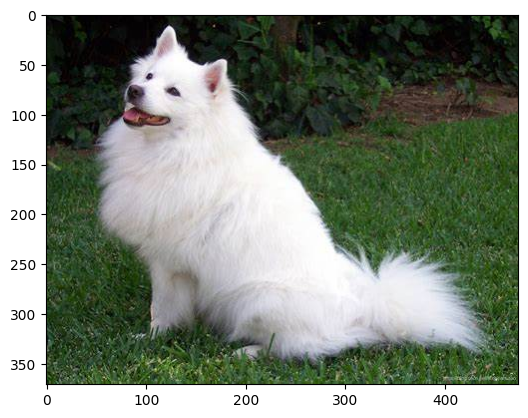

In [27]:
plt.imshow(img)
im = np.array(img)
im.shape

转化数据类型，并且将其转为批量形式(batch_size=1)。

需注意，网络模型的输入总是成批次的，若只有一个输入，则使批次数量为1即可。

In [28]:
img_t = transform(img)
print(img_t.shape, img_t.min())
batch_t = torch.unsqueeze(img_t, 0)
print(batch_t.shape)

torch.Size([3, 224, 224]) tensor(-2.1179)
torch.Size([1, 3, 224, 224])


> 请回答：
> 1. 观测变换前后图像`im`和`img_t`的尺寸是何变化？
> 2. `torch.unsqueeze`是何功能？

### 3. 图像分类

用模型进行分类之前，需将模型设置为`eval`模式。

In [29]:
alexnet.eval()

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [30]:
out = alexnet(batch_t)
print(out.shape)

torch.Size([1, 1000])


> 请回答：
> 1. 请对以下分类功能的代码进行注释，以详细解释输出变量`out`到其类别标签的过程。

In [31]:
_, index = torch.max(out, 1)
print(index)
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100

tensor([258])


#### 读取标签： int => str

查看分类结果到底是什么

In [32]:
with open('imagenet1000_clsidx_to_labels.txt', 'r') as fp:
    label = fp.read()
    label = eval(label)

In [33]:
print(label[int(index[0])])
print(percentage[index[0]].item())

Samoyed, Samoyede
63.1154670715332


若是萨摩亚，分类正确

### 4. 更多示例

使用更多图片进行分类尝试。

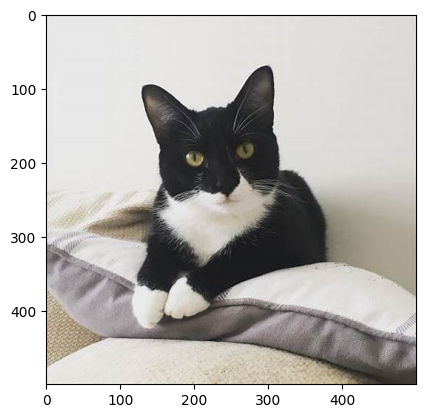

In [34]:
img = Image.open("cat.jpg")
plt.imshow(img)

In [35]:
img_t = transform(img)
batch_t = torch.unsqueeze(img_t, 0)

out = alexnet(batch_t)

_, index = torch.max(out, 1)
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100

print(label[int(index[0])])
print(percentage[index[0]].item())

Egyptian cat
41.64906311035156


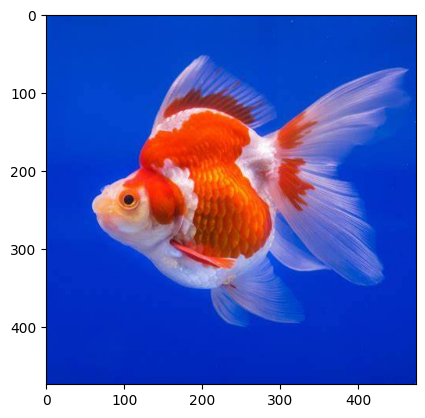

In [36]:
img = Image.open("gold_fish.jpg")
plt.imshow(img)

In [37]:
img_t = transform(img)
batch_t = torch.unsqueeze(img_t, 0)

out = alexnet(batch_t)

_, index = torch.max(out, 1)
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100

print(label[int(index[0])])
print(percentage[index[0]].item())

goldfish, Carassius auratus
99.99734497070312


> 请实验：
> 1. 自行收集图片，做分类测试，查看分类是否正确？

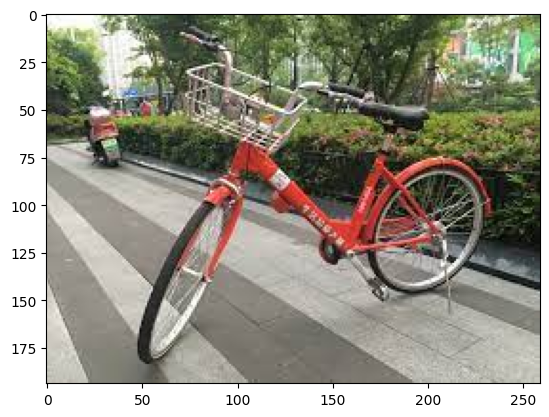

In [38]:
# 请在此给出自行收集图片做分类测试的结果，并简要分析。
img = Image.open("bike.jpg")
plt.imshow(img)

In [39]:
img_t = transform(img)
batch_t = torch.unsqueeze(img_t, 0)

out = alexnet(batch_t)

_, index = torch.max(out, 1)
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100

print(label[int(index[0])])
print(percentage[index[0]].item())

mountain bike, all-terrain bike, off-roader
54.07283401489258


### 分析

分类基本正确，但此车似乎是共享单车，并不是山地车/越野车。